Sam, make sure that you:
- //Clean up any missing values
- //Change floats to integers
- Find the frequency of crimes in zip codes
- Associate coordinates to zip codes **Do Last**
- Find which zip codes have the most crime
- Get zip codes for each crime **APD Description, not FBI**
- Agravated Assault
 - Agg Assault
 - Strangle/Suffocate
 - Family/Date Violence
 - Deadly

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/My Drive/MATH_3439/'

KeyboardInterrupt: ignored

In [2]:
df = pd.read_csv(drive_dir + 'data/2016_austin_crime.csv')
df

NameError: ignored

In [ ]:
df = df.drop(['GO Primary Key' , 'GO Location' , 'GO Census Tract', 'GO District'], axis=1)
df

,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,Clearance Status,Clearance Date,GO Location Zip,GO X Coordinate,GO Y Coordinate
0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,C,12-Jan-16,78735.0,3067322.0,10062796.0
1,9.0,THEFT,Theft,1-Jan-16,C,4-Jan-16,78701.0,3114957.0,10070462.0
2,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,N,3-May-16,78753.0,3129181.0,10106923.0
3,9.0,THEFT,Theft,1-Jan-16,N,22-Jan-16,78701.0,3113643.0,10070357.0
4,4.0,SEXUAL ASSAULT W/ OBJECT,Rape,1-Jan-16,C,10-Mar-16,78753.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37456,7.0,THEFT,Theft,31-Dec-16,N,3-Jan-17,78757.0,3117454.0,10109065.0
37457,9.0,THEFT,Theft,31-Dec-16,N,3-Jan-17,78701.0,3113924.0,10070794.0
37458,1.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,N,16-Jan-17,78723.0,3132812.0,10084356.0
37459,3.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,N,12-Jan-17,78742.0,3131778.0,10062481.0


In [ ]:
df.columns = ['council_district', 'apd_desc', 'fbi_desc', 'report_date', 'clearance_status', 'clearance_date', 'zip_code', 'x_coordinate', 'y_coordinate']
df

,council_district,apd_desc,fbi_desc,report_date,clearance_status,clearance_date,zip_code,x_coordinate,y_coordinate
0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,C,12-Jan-16,78735.0,3067322.0,10062796.0
1,9.0,THEFT,Theft,1-Jan-16,C,4-Jan-16,78701.0,3114957.0,10070462.0
2,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,N,3-May-16,78753.0,3129181.0,10106923.0
3,9.0,THEFT,Theft,1-Jan-16,N,22-Jan-16,78701.0,3113643.0,10070357.0
4,4.0,SEXUAL ASSAULT W/ OBJECT,Rape,1-Jan-16,C,10-Mar-16,78753.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37456,7.0,THEFT,Theft,31-Dec-16,N,3-Jan-17,78757.0,3117454.0,10109065.0
37457,9.0,THEFT,Theft,31-Dec-16,N,3-Jan-17,78701.0,3113924.0,10070794.0
37458,1.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,N,16-Jan-17,78723.0,3132812.0,10084356.0
37459,3.0,BURGLARY OF VEHICLE,Theft,31-Dec-16,N,12-Jan-17,78742.0,3131778.0,10062481.0


In [ ]:
df['clearance_date'] = pd.to_datetime(df['clearance_date'])

In [ ]:
df = df.dropna(how='any')
df.isna().sum()

council_district    0
apd_desc            0
fbi_desc            0
report_date         0
clearance_status    0
clearance_date      0
zip_code            0
x_coordinate        0
y_coordinate        0
dtype: int64

In [ ]:
df['zip_code'] = df['zip_code'].astype(int)
df['x_coordinate'] = df['x_coordinate'].astype(int)
df['council_district'] = df['council_district'].astype(int)
df['y_coordinate'] = df['y_coordinate'].astype(int)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,council_district,apd_desc,fbi_desc,report_date,clearance_status,clearance_date,zip_code,x_coordinate,y_coordinate
0,8,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,C,2016-01-12,78735,3067322,10062796
1,9,THEFT,Theft,1-Jan-16,C,2016-01-04,78701,3114957,10070462
2,4,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,N,2016-05-03,78753,3129181,10106923
3,9,THEFT,Theft,1-Jan-16,N,2016-01-22,78701,3113643,10070357
5,1,DEADLY CONDUCT,Agg Assault,1-Jan-16,N,2016-01-08,78724,3146947,10077985


In [ ]:
df.groupby('zip_code')['fbi_desc'].value_counts()

zip_code  fbi_desc   
78613     Theft          291
          Auto Theft      12
          Burglary         7
          Robbery          2
78617     Theft          163
                        ... 
78759     Theft          862
          Burglary       163
          Auto Theft      39
          Agg Assault     38
          Robbery         15
Name: fbi_desc, Length: 220, dtype: int64

In [ ]:
df['zip_code'].value_counts().head()

78741    3121
78753    2904
78704    2380
78758    2281
78745    2108
Name: zip_code, dtype: int64

In [ ]:
df['fbi_desc'].value_counts()

Theft          24845
Burglary        5025
Agg Assault     2086
Auto Theft      1988
Robbery          911
Murder            30
Name: fbi_desc, dtype: int64

We note that these 5 ZIP codes had the most crime in 2016

In [ ]:
agg_assault_zip_df = df.groupby('fbi_desc')['zip_code'].value_counts().head(3)
agg_assault_zip_df

fbi_desc     zip_code
Agg Assault  78753       221
             78741       218
             78758       185
Name: zip_code, dtype: int64

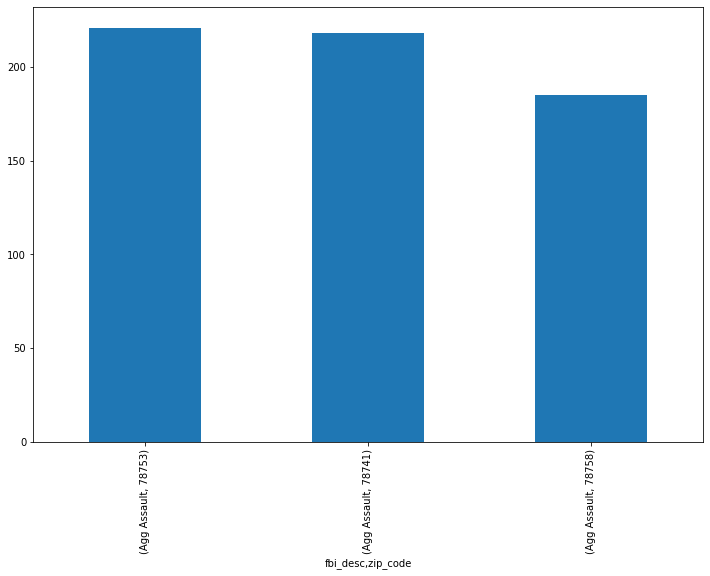

In [ ]:
agg_assault_zip_df.plot(kind='bar', figsize=(12,8))


In [ ]:
for zip_code in df.groupby('fbi_desc')['zip_code'].value_counts():
  print(f'{zip_code}')

221
218
185
145
141
124
119
115
104
96
76
74
60
45
38
31
30
29
28
22
19
19
18
18
16
15
14
13
13
10
9
6
5
3
2
2
2
1
240
164
162
158
138
126
86
84
76
75
74
52
49
45
39
36
32
31
30
27
27
25
23
23
22
18
18
16
12
12
10
10
10
10
7
5
4
4
3
2
2
1
520
406
377
354
308
299
276
219
186
180
180
163
139
117
115
108
102
87
69
68
67
67
64
63
55
53
52
50
45
44
40
31
29
21
19
12
11
9
8
7
3
2
5
4
4
3
2
2
2
2
1
1
1
1
1
1
125
101
101
74
67
67
56
52
38
34
20
19
17
16
15
15
12
12
8
8
6
6
5
4
4
4
4
3
3
3
3
2
2
1
1
1
1
1
2036
2016
1788
1671
1439
1427
1356
1222
999
941
862
845
794
758
686
652
574
532
394
368
331
291
269
265
265
238
214
212
200
171
163
146
135
119
117
103
86
41
36
35
25
14
4
3
1
1
